# Loop Workflow Example 2

> * High level approach to making a 3D model from just a bounding box you can draw
> * To run this notebook for the first time, there are some dependencies needed to use the interactive map. Execute the cell immediately below and restart jupyter.

In [1]:
#!conda install -c conda-forge folium ipyleaflet ipywidgets -y 
#!conda install -c conda-forge folium ipyleaflet  -y 
#!jupyter nbextension enable --py --sys-prefix ipyleaflet
import geopandas as gpd
from map2loop import m2l_utils
m2l_utils.v()

0.0.61


## Leaflet Maps

In [2]:
import ipywidgets as widgets
import os
import matplotlib.pyplot as plt

# load last saved map area and model engine (if they exist)
if(not os.path.isdir('../scratch/')):
    os.mkdir('../scratch/')
if(os.path.isfile('../scratch/last_choices.txt')):
    f=open('../scratch/last_choices.txt','r')
    contents =f.readlines()
    f.close()
    default_map=contents[0].replace("\n","")
    default_engine=contents[1].replace("\n","")
else:
    default_map='Turner_Syncline'
    default_engine='loopstructural'

options=['Draw Your Own','Last Area Drawn']

if(not default_map in options):
    default_map= options[0]

map_choice=widgets.Dropdown(
    options=options,
    value=default_map,
    description='Map area:',
    disabled=False,
)
display(map_choice)

Dropdown(description='Map area:', options=('Draw Your Own', 'Last Area Drawn'), value='Draw Your Own')

In [21]:
test_data_name=map_choice.value
print(test_data_name)

Draw Your Own


In [22]:
import folium
import pandas as pd
import json
import random
from shapely.geometry import Polygon
from ipyleaflet import Map, basemaps, GeoJSON, LayersControl, DrawControl,WMSLayer, GeoData
from ipywidgets import Label
from ipywidgets import Label
import ipywidgets as widgets
import geopandas as gpd

if(not test_data_name =='Draw Your Own'):
    if(test_data_name=='Last Area Drawn'):
        last_coords=pd.read_csv('../scratch/last_area.csv')
        display(last_coords)
        minx=last_coords.iloc[0]['minx']
        miny=last_coords.iloc[0]['miny']
        maxx=last_coords.iloc[0]['maxx']
        maxy=last_coords.iloc[0]['maxy']
    elif(not test_data_name =='Draw Your Own'):
        y_point_list = [miny, miny, maxy, maxy, maxy]
        x_point_list = [minx, maxx, maxx, minx, minx]
        bbox_geom = Polygon(zip(x_point_list, y_point_list))
        polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom])
        polygon_ll=polygon.to_crs(src_crs)

        minx=polygon_ll.total_bounds[0]
        maxx=polygon_ll.total_bounds[2]
        miny=polygon_ll.total_bounds[1]
        maxy=polygon_ll.total_bounds[3]

        minlong=minx
        maxlong=maxx
        minlat=miny
        maxlat=maxy
        #print("x",polygon_ll.total_bounds[0])
        st_bbox=[minlong,minlat,maxlong,maxlat]
        lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
        lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
        bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
        rect = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 

    
    src_crs = "epsg:4326"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
    dst_crs = "epsg:28350"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)

    bbox2=str(minx)+","+str(miny)+","+str(maxx)+","+str(maxy)
    y_point_list = [miny, miny, maxy, maxy, maxy]
    x_point_list = [minx, maxx, maxx, minx, minx]
    bbox_geom = Polygon(zip(x_point_list, y_point_list))
    polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom])
    polygon_ll=polygon.to_crs(src_crs)

    minlong=polygon_ll.total_bounds[0]
    maxlong=polygon_ll.total_bounds[2]
    minlat=polygon_ll.total_bounds[1]
    maxlat=polygon_ll.total_bounds[3]
    
    minlong=minx
    maxlong=maxx
    minlat=miny
    maxlat=maxy

    lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
    lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
    bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
    rect = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 

    example_rect = GeoData(geo_dataframe = rect,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},                  
                   name = 'Example')
    center=(minlat+((maxlat-minlat)/2),minlong+((maxlong-minlong)/2))
else:
    center=(-22.6,117.3)
    
wms_warox = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:waroxi_wa_4326_bed',
    format='image/png',
    transparent=True,
    attribution='Outcrop data from GSWA',
    name='outcrops'

)
wms_geol = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:2_5m_interpgeop15_4326',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Geology data from GSWA',
    name='geology'
)
wms_faults = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:gswa_2_5m_interpstrucl15',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Linear features data from GSWA',
    name='faults/folds'
)

m =Map(basemap=basemaps.OpenTopoMap, center=center, zoom=8,scroll_wheel_zoom=True)
label = Label()
display(label)

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        label.value = str(kwargs.get('coordinates'))

m.on_interaction(handle_interaction)
m.add_layer(wms_geol)
m.add_layer(wms_faults)
m.add_layer(wms_warox)
if( not test_data_name =='Draw Your Own'):
    m.add_layer(example_rect)

    


m.add_control(LayersControl())
dc = DrawControl(rectangle={'shapeOptions': {'color': '#0000FF'}})
m.add_control(dc)
m

Label(value='')

Map(center=[-22.6, 117.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [23]:
if(test_data_name=='Draw Your Own' or test_data_name=='Last Area Drawn'):
    if(test_data_name=='Draw Your Own'):
        new_poly=GeoJSON(data=dc.last_draw)
        new_poly=str(new_poly)

        if("'geometry': None" in new_poly):
            raise NameError('map2loop error: No rectangle selected')
        new_poly=new_poly.rsplit("'coordinates': ", 1)[1]
        new_poly=new_poly.replace('[[[','').replace('[','').replace(']]]}})','').replace('],','').replace(',','').split(" ")
        longs=new_poly[0::2]
        lats=new_poly[1::2]
        minlong=float(min(longs))
        maxlong=float(max(longs))
        minlat=float(max(lats)) #ignores sign
        maxlat=float(min(lats)) #ignores sign
        
    bounds=(minlong,maxlong,minlat,maxlat)
    src_crs = "epsg:4326"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
    dst_crs = "epsg:28350" # coordinate system for example data


    lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
    lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
    bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
    mbbox = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 
    bbox=mbbox.total_bounds
    st_bbox=[bbox[0],bbox[1],bbox[2],bbox[3]]
    print(src_crs,mbbox.total_bounds)
    mbbox=mbbox.to_crs(dst_crs)
    print(dst_crs,mbbox.total_bounds)
    
    f=open('../scratch/last_area.csv','w') 
    ostr='minx,miny,maxx,maxy\n'
    f.write(ostr)
    ostr=str(minlong)+','+str(minlat)+','+str(maxlong)+','+str(maxlat)+'\n'
    f.write(ostr)
    f.close()
    

epsg:4326 [116.36426  -22.552989 117.619654 -22.095661]
epsg:28350 [ 434421.51082093 7505823.747381    563919.12268226 7556454.63065511]


In [24]:
import time
import warnings

t0 = time.time()
warnings.filterwarnings('ignore')


## Map2Loop

Directory "./model-test" exists, overwrite? (y/[n])y

 orientations layer  metadata
--------------------
    bbox [ 434779.14120881 7506230.44295177  562663.9448064  7555334.99444664]
    CRS None
    # items 178
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [ 397589.59605301 7430805.86939398  680922.55097212 7612110.3698618 ]
    CRS None
    # items 97
    Data types ['MultiPolygon']

 fold layer  metadata
--------------------
    bbox [ 434421.51082093 7505823.747381    563919.12268226 7556454.63065511]
    CRS None
    # items 28
    Data types ['LineString']

 fault layer  metadata
--------------------
    bbox [ 434421.51082093 7505823.747381    548978.50085605 7556454.63065511]
    CRS +init=epsg:28350 +type=crs
    # items 61
    Data types ['LineString']

 mindeps layer  metadata
--------------------
    bbox [ 441168.03763529 7505970.73157099  562929.09633966 7555862.84024716]
    CRS None
    # items 202
    Data types ['Point']

Warnings:


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Input graphic saved to: ./model-test/tmp/input-fig.png
Generating topology analyser input...
97  polygons
Successful parameter load
Output directory created at: ./model-test/graph/
Topology analysis complete.

Resolving ambiguities using ASUD...	output_dir:./model-test/graph/
Done.
Generating topology graph display and unit groups...
0    'Fortescue Group', 'anchor': 'n', 'fontStyle': 'bold'
1    'Hamersley Group', 'anchor': 'n', 'fontStyle': 'bold'
2    'Shingle Creek Group', 'anchor': 'n', 'fontStyle': 'bold'
3    'Turee Creek Group', 'anchor': 'n', 'fontStyle': 'bold'
4    'Wyloo Group', 'anchor': 'n', 'fontStyle': 'bold'
5    'Beasley River Quartzite'
6    'Boolgeeda Iron Formation'
7    'Brockman Iron Formation'
8    'Bunjinah Formation'
9    'Cheela Springs Basalt'
10    'Duck Creek Dolomite'
11    'Fortescue Group'
12    'Jeerinah Formation'
13    'Marra Mamba Iron Formation'
14    'Mount McGrath Formation'
15    'Mount McRae Shale and Mount Sylvia Formation'
16    'Pyradie Form

 10%|████████                                                                         | 10/100 [00:08<01:19,  1.14it/s]

Done
Fetching DTM...  bbox:116.26218482609636 117.72167694510462 -22.653043975666606 -21.995599222743436
Attempt: 0 

 20%|████████████████▏                                                                | 20/100 [00:10<00:34,  2.29it/s]

dtm geotif saved as ./model-test/dtm/dtm.tif
Done.
reprojected dtm geotif saved as ./model-test/dtm/dtm_rp.tif


 30%|████████████████████████▎                                                        | 30/100 [00:11<00:22,  3.08it/s]

group choices: 1
dtb and dtb_null set to 0
176 orientations saved to ./model-test/output/orientations.csv


 50%|████████████████████████████████████████▌                                        | 50/100 [00:12<00:07,  6.57it/s]

extra orientations saved as ./model-test/output//empty_series_orientations.csv
basal contacts saved allpts =  5584 deci_pts =  1372
saved as ./model-test/tmp/all_contacts.csv and ./model-test/tmp/contacts.csv
basal contacts without faults saved as ./model-test/tmp/basal_contacts.shp


 60%|████████████████████████████████████████████████▌                                | 60/100 [00:23<00:16,  2.38it/s]

decimated contacts saved as ./model-test/output/contacts4.csv
All observations n= 178
groups ['Hamersley Group' 'Shingle Creek Group' 'Fortescue Group'
 'Turee Creek Group' 'Wyloo Group'] 
codes ['Woongarra Rhyolite' 'Weeli Wolli Formation' 'Beasley River Quartzite'
 'Brockman Iron Formation' 'Boolgeeda Iron Formation'
 'Mount McRae Shale and Mount Sylvia Formation'
 'Marra Mamba Iron Formation' 'Jeerinah Formation' 'Bunjinah Formation'
 'Wittenoom Formation' 'Turee Creek Group' 'Fortescue Group'
 'Cheela Springs Basalt' 'Duck Creek Dolomite' 'Mount McGrath Formation'
 'Pyradie Formation']
----------------------------------------------------------------------------------------------------------------------
Hamersley Group observations n= 102
strike/dip of girdle 203.07508492849198 / 89.0740502748331
----------------------------------------------------------------------------------------------------------------------
Shingle Creek Group observations n= 14
strike/dip of girdle 2.34526893

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:34<00:18,  1.59it/s]

259 102
fault orientations saved as ./model-test/output/fault_orientations.csv
fault positions saved as ./model-test/output/faults.csv
fault dimensions saved as ./model-test/output/fault_dimensions.csv
Fault Fault_7389 with displacement of 3618 capped to 1680.5176127554435
Fault Fault_7389 with displacement of 5347 capped to 1680.5176127554435
Fault Fault_7389 with displacement of 2707 capped to 1680.5176127554435
Fault Fault_8605 with displacement of 2901 capped to 1148.4539960283378
Fault Fault_17203 with displacement of 1644 capped to 1315.6239935151814
Fault Fault_513 with displacement of 3346 capped to 1159.738898849079
Fault Fault_513 with displacement of 28772 capped to 1159.738898849079
Fault Fault_6008 with displacement of 11059 capped to 2391.877788375701
Fault Fault_6008 with displacement of 8456 capped to 2391.877788375701
Fault Fault_7275 with displacement of 1071 capped to 863.2390855561429
Fault Fault_8403 with displacement of 1523 capped to 346.6690224061213
Fault Fault

 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [01:33<00:16,  1.69s/it]

 Fault_16769 with displacement of 727 capped to 394.20913263247763
fault displacement estimates saved as ./model-test/output/fault_displacements3.csv
near-fault orientations saved as ./model-test/tmp/ex_f_combo_full.csv
near-fault orientations saved as ./model-test/tmp/ex_f_combo_full.csv
0 Wyloo_Group
1 Shingle_Creek_Group
2 Turee_Creek_Group
3 Hamersley_Group
4 Fortescue_Group
pluton contacts and orientations saved as:
./model-test/output/ign_contacts.csv
./model-test/output/ign_orientations_domes.csv
Propagating dips along contacts...
102
1072 points saved to ./model-test/tmp/raw_contacts.csv
595 thickness estimates saved as ./model-test/output/formation_thicknesses.csv
['Weeli_Wolli_Formation' 'Mount_McRae_Shale_and_Mount_Sylvia_Formation'
 'Turee_Creek_Group' 'Boolgeeda_Iron_Formation' 'Woongarra_Rhyolite'
 'Beasley_River_Quartzite' 'Cheela_Springs_Basalt' 'Wittenoom_Formation'
 'Jeerinah_Formation' 'Brockman_Iron_Formation'
 'Marra_Mamba_Iron_Formation'] already processed
6 min t

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:10<00:00,  1.30s/it]

cycles []


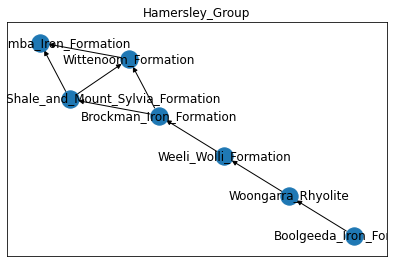

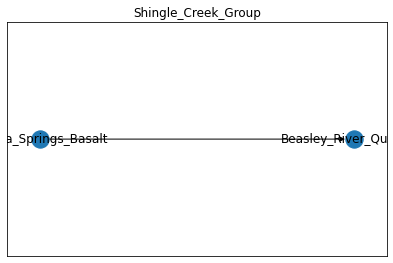

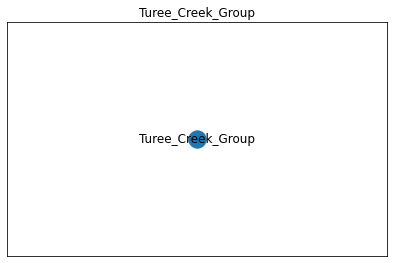

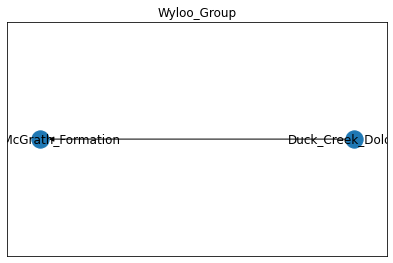

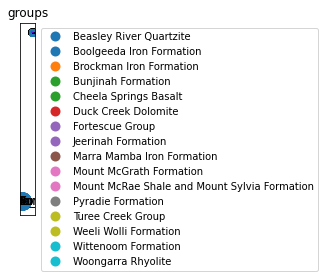

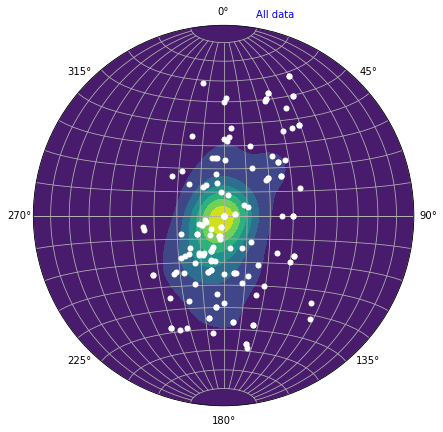

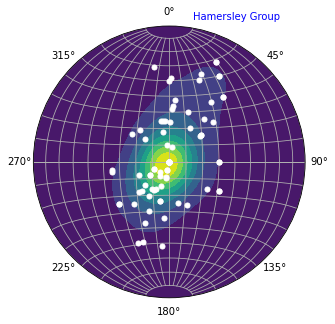

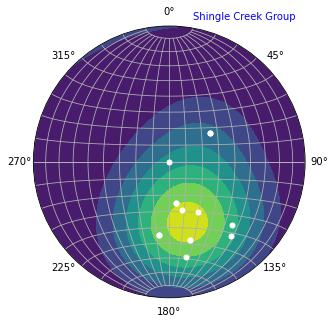

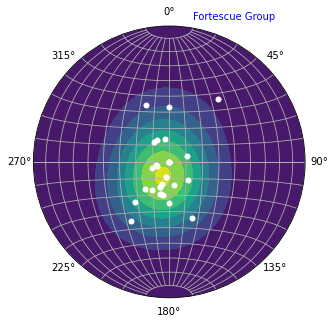

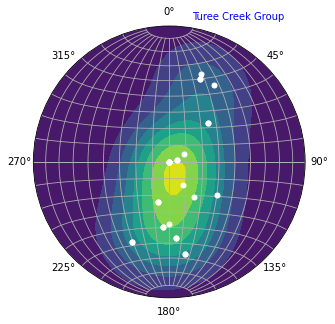

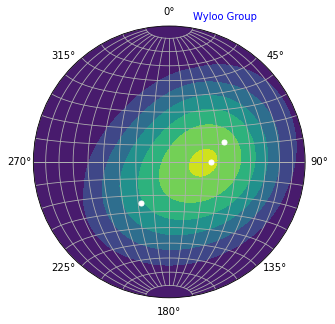

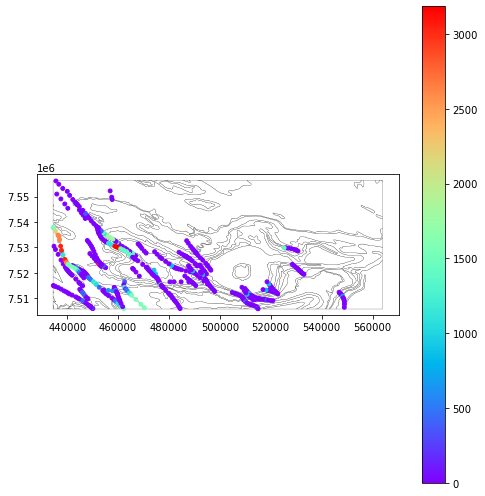

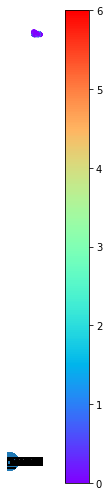

In [25]:
import os
from map2loop.project import Project
proj = Project(
                loopdata_state="WA"
                )

proj.update_config(
                    out_dir='./model-test',
                    overwrite='True',                    
                    bbox_3d={
                         "minx": mbbox.total_bounds[0], #500000,
                         "miny": mbbox.total_bounds[1], #7490000,
                         "maxx": mbbox.total_bounds[2], #545000,
                         "maxy": mbbox.total_bounds[3], #7520000,
                         "base": -4800,
                         "top": 1200,
                     },
                    proj_crs={'init': 'EPSG:28350'},
                    quiet=False
                  )
proj.run()

## Loop Structural

In [26]:
# Define project pathing from m2l
proj_path = proj.config.project_path
graph_path = proj.config.graph_path
tmp_path = proj.config.tmp_path
data_path = proj.config.data_path
dtm_path = proj.config.dtm_path
output_path = proj.config.output_path
vtk_path = proj.config.vtk_path

# Define project bounds
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

fault_file = proj.config.fault_file_csv

In [27]:
import random
import os
import time
from datetime import datetime
import shutil
import logging
logging.getLogger().setLevel(logging.ERROR)

import numpy as np
from LoopStructural import GeologicalModel
import lavavu
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel

nowtime=datetime.now().isoformat(timespec='minutes')   
model_name='leaflet'+'_'+nowtime.replace(":","-").replace("T","-")
if (os.path.exists(vtk_path+model_name)):
    shutil.rmtree(vtk_path+model_name)
os.mkdir(vtk_path+model_name)
filename=vtk_path+model_name+'/'+'surface_name_{}.vtk'


f=open(tmp_path+'bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()
t1 = time.time()
fault_params = {'interpolatortype':'FDI',
                'nelements':3e4,
                #'data_region':.3,
                'solver':'pyamg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                    'nelements':0.5e5,  # how many tetras/voxels
                    'buffer':0.8,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'damp':True}

if(not os.path.exists(fault_file)):
    f=open(output_path + '/fault_displacements3.csv','w')
    f.write('X,Y,fname,apparent_displacement,vertical_displacement,downthrow_dir\n')
    f.close()
    f=open(output_path + '/fault_orientations.csv','w')
    f.write('X,Y,Z,DipDirection,dip,DipPolarity,formation\n')
    f.close()
    f=open(output_path + '/faults.csv','w')
    f.write('X,Y,Z,formation\n')
    f.close()
    f=open(output_path + '/fault-fault-relationships.csv','w')
    f.write('fault_id\n')
    f.close()
    f=open(output_path + '/group-fault-relationships.csv','w')
    f.write('group\n')
    f.close()

    model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=True,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)
else:
    model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=False,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)

view = LavaVuModelViewer(model,vertical_exaggeration=1) 
view.nsteps = np.array([200,200,200])
#view.set_zscale(2)
view.nsteps=np.array([50,50,50])
view.add_model_surfaces(filename=filename,cmap='tab20')
#view.add_model_surfaces()
for sg in model.feature_name_index:
    if( 'super' in sg):
        view.add_data(model.features[model.feature_name_index[sg]])
view.lv.webgl(vtk_path+model_name)
view.nsteps = np.array([200,200,200])
view.add_model(cmap='tab20')
view.interactive()  

t2 = time.time()
print("m2l",(t1-t0)/60.0,"LoopStructural",(t2-t1)/60.0,"Total",(t2-t0)/60.0,"minutes")

Updating geological model. There are: 
109 geological features that need to be interpolated



  0%|          | 0/109 [00:00<?, ?it/s]

Model update took: 41.75679349899292 seconds


  0%|          | 0/52 [00:00<?, ?it/s]

Adding surfaces took 17.433089017868042 seconds


m2l 2.5696069558461505 LoopStructural 1.4880173325538635 Total 4.057624288400015 minutes


In [28]:
extra_plots=True

## Overlay map over model

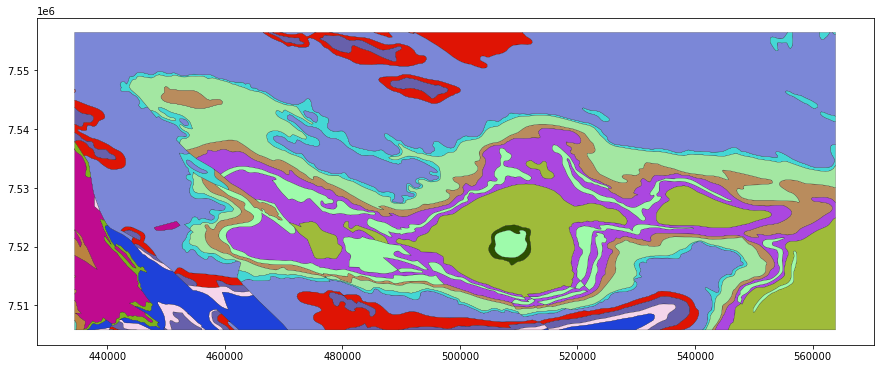

In [29]:
import matplotlib
c_l= {'c':'unitname', 'f':'feature',"fault": 'Fault'}
geol_clip=gpd.read_file('model-test/tmp/geol_clip.shp')
if(extra_plots):
    import matplotlib.colors as colors
    clut_path ='./500kibg_colours.csv'
    if(clut_path ==''):
        geol_clip.plot(column=c_l['c'],figsize=(10,10),edgecolor='#000000',linewidth=0.2,)
        use_cmap=False
        cmap=0
    else:
        use_cmap=True
        asc=pd.read_csv(tmp_path+'all_sorts_clean.csv',",")
        #display(asc)
        colours=pd.read_csv(clut_path,",")
        if( c_l['c']=='CODE'):
            code=c_l['c'].lower()
        else:
            code=c_l['c']

        colours = [] #container for the discrete colours we are using
        i=0
        geol_clip['colour_index'] = np.nan #initialise a colour index attribute column
        for ind,strat in asc.iterrows():
            geol_clip[c_l['c']].str.replace(" ","_")
            geol_clip.loc[geol_clip[c_l['c']]==strat['code'].replace("_"," "),'colour_index'] = i
            colours.append(strat['colour'])
            i=i+1

        cmap = colors.ListedColormap(colours) # create a cmap for passing to geopandas
        #display(colours)
        fig, ax = matplotlib.pyplot.subplots(figsize=(15, 15))
        geol_clip.plot(ax=ax,column='colour_index',figsize=(10,10),edgecolor='#000000',linewidth=0.2,cmap=cmap)


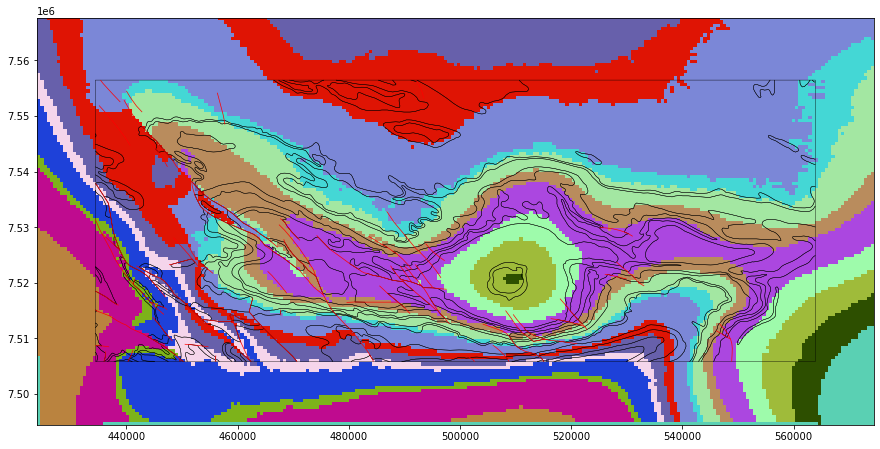

In [30]:
dtm_reproj_file='model-test/dtm/dtm_rp.tif'
faults_clip=gpd.read_file('model-test/tmp/faults_clip.shp')
from map2loop import m2l_export
import rasterio
if(extra_plots):  
    dtm = rasterio.open(dtm_reproj_file)
    if(os.path.exists(fault_file)):
        f_clip=faults_clip[faults_clip[c_l['f']].str.contains(c_l['fault'])]
        m2l_export.display_LS_map(model,dtm,geol_clip,f_clip,dst_crs,True,cmap,use_topo=True,use_faults=True)
    else:
        f_clip=[]
        m2l_export.display_LS_map(model,dtm,geol_clip,f_clip,dst_crs,True,cmap,use_topo=True,use_faults=False)

    dtm.close()


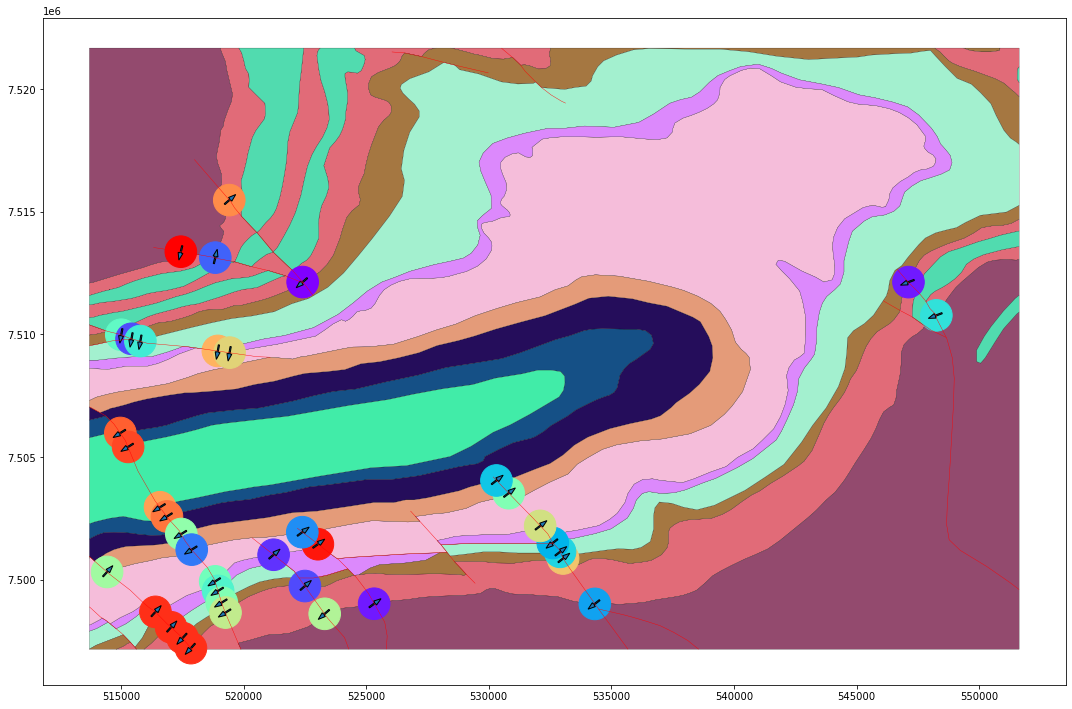

In [15]:
import math
def plot_arrows(point_source,geol_clip, colour_code,x_code,y_code,legend,dtype):
    from shapely.geometry import Point
    thick=pd.read_csv(point_source,encoding = "ISO-8859-1", dtype='object')
    if(dtype=='numeric'):
        thick['cc']=pd.to_numeric(thick[colour_code])
    else:
        thick['cc']=thick[colour_code].str.zfill(5)
    thick[x_code]=thick[x_code].astype('float64')
    thick[y_code]=thick[y_code].astype('float64')
    thick=gpd.GeoDataFrame(thick, geometry=[Point(xy) for xy in zip(thick[x_code], thick[y_code])])
    base=geol_clip.plot(column='colour_index',figsize=(15,15),edgecolor='#000000',linewidth=0.2,cmap=cmap)
    plot2 =faults_clip.plot(ax=base,color='red',figsize=(15,15),edgecolor='#ff0000',linewidth=0.4)
    plot2 = thick.plot(ax=base, column='cc', markersize=1000,cmap='rainbow', legend=legend)
    for ind,pt in thick.iterrows():
        dx=math.sin(math.radians(float(pt['downthrow_dir'])))*300
        dy=math.cos(math.radians(float(pt['downthrow_dir'])))*300
        plot2 = plt.arrow(int(pt['X'])-(dx/1.2), int(pt['Y'])-(dy/1.2), dx, dy,width=50,head_width=200)
    
    plot2 = plot2.figure; plot2.tight_layout()
    
# to make the map
if( extra_plots):
    plot_arrows(output_path+'fault_displacements3.csv',geol_clip,'vertical_displacement','X','Y',False,'alpha')

## Plot fault throw from LS

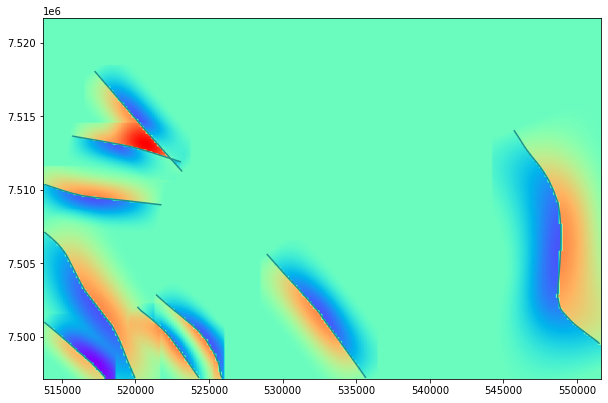

In [16]:
if(extra_plots):

    from LoopStructural.visualisation import MapView
    mapview = MapView(model)
    mapview.nsteps=(200,200)
    #plt.colorbar()
    mapview.add_fault_displacements()
    mapview.add_faults()


## Save voxel model

In [ ]:
if(extra_plots and False):  
    voxel_size=500
    sizex=int((maxx-minx)/voxel_size)
    sizey=int((maxy-miny)/voxel_size)
    sizez=int((model_top-model_base)/voxel_size)
    print('voxel_size=',voxel_size,', saved in Z,Y,X order 16 bit unisgned, X(height)=',sizex,', Y(#ims)=',sizey,', Z(width)=',sizez)
    print('lower south west corner: west=',minx,', south=',miny,', lower=',model_base)
    voxels=model.evaluate_model(model.regular_grid(nsteps=(sizey,sizex,sizez),shuffle=False),scale=False)
    #np.savetxt(tmp_path+'voxels.txt', [voxels], fmt='%2d',delimiter=',',newline='')
    voxels.astype('int16').tofile(tmp_path+'voxels.raw')
    print('voxels saved as',tmp_path+'voxels.raw')